<a href="https://colab.research.google.com/github/victoriapicodiaz/portfolio-ia/blob/main/Tarea5IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ucimlrepo


In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, classification_report

print("Setup completo!")


Setup completo!


In [ ]:
student_data = fetch_ucirepo(id=697)
X = student_data.data.features
y = student_data.data.targets


In [ ]:
print(f"Estudiantes: {X.shape[0]}, Características: {X.shape[1]}")
print(f"Objetivo: Predecir {len(y.columns)} variable(s)")


Estudiantes: 4424, Características: 36
Objetivo: Predecir 1 variable(s)


In [ ]:
target_col = y.columns[0]  # Primera columna objetivo
y_series = y[target_col]
print(f"\nVariable objetivo: {target_col}")



Variable objetivo: Target


In [ ]:
target_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
y_mapped = y_series.map(target_mapping)

In [ ]:
print("\nDistribución de resultados académicos:")
value_counts = y_mapped.value_counts()
for outcome, count in value_counts.items():
    percentage = (count / len(y_mapped)) * 100
    print(f"  {outcome}: {count} estudiantes ({percentage:.1f}%)")



Distribución de resultados académicos:


In [ ]:
print(f"\nPrimeras características:")
print(X.columns.tolist()[:10], "...")


Primeras características:
['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification"] ...


In [ ]:
print(f"\nAge at enrollment:")
if 'Age at enrollment' in X.columns:
    age_col = X['Age at enrollment']
    print(f"  Promedio: {age_col.mean():.1f} años")
    print(f"  Rango: {age_col.min():.0f}-{age_col.max():.0f} años")


Age at enrollment:
  Promedio: 23.3 años
  Rango: 17-70 años


In [ ]:
target_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
reverse_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [ ]:
if y_series.dtype == 'object':
    y_target = y_series.map(reverse_mapping)
else:
    y_target = y_series

X_features = X

In [ ]:
print("Datos preparados para validación:")
print(f"X shape: {X_features.shape}")
print(f"y shape: {y_target.shape}")
print(f"Clases únicas: {sorted(y_target.unique())}")
print(f"Mapeo: {target_mapping}")

Datos preparados para validación:
X shape: (4424, 36)
y shape: (4424,)
Clases únicas: [np.int64(0), np.int64(1), np.int64(2)]
Mapeo: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_robust = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score

scores_kfold = cross_val_score(
    pipeline_robust, X_features, y_target, cv=kfold, scoring='accuracy'
)
print(f"\nKFOLD RESULTS:")
print(f"   Scores individuales: {scores_kfold}")
print(f"   Media: {scores_kfold.mean():.4f}")
print(f"   Desviación estándar: {scores_kfold.std():.4f}")
print(f"   Resultado: {scores_kfold.mean():.4f} ± {scores_kfold.std():.4f}")


KFOLD RESULTS:
   Scores individuales: [0.75254237 0.76610169 0.76836158 0.77740113 0.78054299]
   Media: 0.7690
   Desviación estándar: 0.0098
   Resultado: 0.7690 ± 0.0098


In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores_stratified = cross_val_score(
    pipeline_robust, X_features, y_target, cv=stratified_kfold, scoring='accuracy'
)

print(f"\nSTRATIFIED KFOLD RESULTS:")
print(f"   Scores individuales: {scores_stratified}")
print(f"   Media: {scores_stratified.mean():.4f}")
print(f"   Desviación estándar: {scores_stratified.std():.4f}")
print(f"   Resultado: {scores_stratified.mean():.4f} ± {scores_stratified.std():.4f}")


STRATIFIED KFOLD RESULTS:
   Scores individuales: [0.76836158 0.76836158 0.76271186 0.75480226 0.75452489]
   Media: 0.7618
   Desviación estándar: 0.0061
   Resultado: 0.7618 ± 0.0061


In [ ]:
print(f"\nCOMPARACIÓN DE ESTABILIDAD:")
if scores_stratified.std() < scores_kfold.std():
    print("   StratifiedKFold es MÁS ESTABLE (menor variabilidad)")
    mejor_cv = "StratifiedKFold"
else:
    print("   KFold es MÁS ESTABLE (menor variabilidad)")
    mejor_cv = "KFold"

print(f"   Recomendación: Usar {mejor_cv} para este dataset")



COMPARACIÓN DE ESTABILIDAD:
   StratifiedKFold es MÁS ESTABLE (menor variabilidad)
   Recomendación: Usar StratifiedKFold para este dataset


/tmp/ipython-input-1250371712.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_kfold, scores_stratified], labels=['KFold', 'StratifiedKFold'])


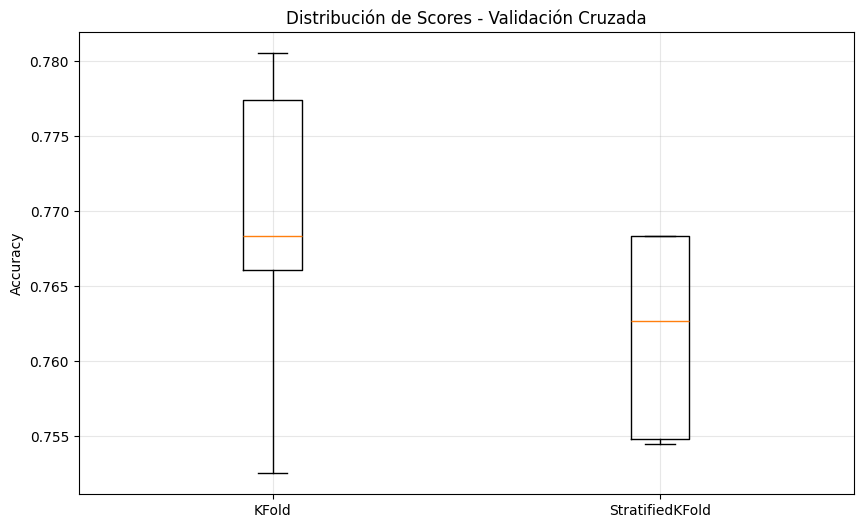

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([scores_kfold, scores_stratified], labels=['KFold', 'StratifiedKFold'])
plt.title('Distribución de Scores - Validación Cruzada')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("🏆 TORNEO: ¿Cuál modelo funciona mejor para diagnóstico médico?")

🏆 TORNEO: ¿Cuál modelo funciona mejor para diagnóstico médico?


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt

In [ ]:
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),

    # 2. Ridge Classifier (regresión logística con regularización L2)
    'Ridge Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RidgeClassifier(alpha=1.0, random_state=42))
    ]),

    # 3. Random Forest (ensemble, no necesita escalado)
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

print(f"Modelos en competencia: {list(models.keys())}")

Modelos en competencia: ['Logistic Regression', 'Ridge Classifier', 'Random Forest']


In [ ]:
print(f"\nEVALUANDO MODELOS CON 5-FOLD CV...")

results = {}
for name, model in models.items():
    print(f"   Evaluando {name}...")

    # Usar StratifiedKFold para mantener balance de clases
    scores = cross_val_score(
        model, X_features, y_target,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy'
    )

    results[name] = scores

    print(f"   {name}: {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"      Scores: {[f'{s:.3f}' for s in scores]}")


EVALUANDO MODELOS CON 5-FOLD CV...
   Evaluando Logistic Regression...
   Logistic Regression: 0.7618 ± 0.0061
      Scores: ['0.768', '0.768', '0.763', '0.755', '0.755']
   Evaluando Ridge Classifier...
   Ridge Classifier: 0.7509 ± 0.0032
      Scores: ['0.755', '0.746', '0.754', '0.749', '0.751']
   Evaluando Random Forest...
   Random Forest: 0.7658 ± 0.0064
      Scores: ['0.775', '0.764', '0.771', '0.763', '0.757']


In [ ]:
print(f"\nRESULTADOS FINALES:")


RESULTADOS FINALES:


In [ ]:
best_mean_score = 0
best_model_name = ""

for name, scores in results.items():
    if scores.mean() > best_mean_score:
        best_mean_score = scores.mean()
        best_model_name = name

print(f"GANADOR: {best_model_name}")
print(f"Score: {best_mean_score:.4f}")

GANADOR: Random Forest
Score: 0.7658


In [ ]:
print(f"\nANÁLISIS DE ESTABILIDAD:")
for name, scores in results.items():
    stability = scores.std()

    if stability < 0.02:
        status = "MUY ESTABLE"
    elif stability < 0.05:
        status = "ESTABLE"
    else:
        status = "INESTABLE"

    print(f"   {name}: {status} (std: {stability:.4f})")


ANÁLISIS DE ESTABILIDAD:
   Logistic Regression: MUY ESTABLE (std: 0.0061)
   Ridge Classifier: MUY ESTABLE (std: 0.0032)
   Random Forest: MUY ESTABLE (std: 0.0064)


In [ ]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

/tmp/ipython-input-348474132.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[name] for name in models.keys()],


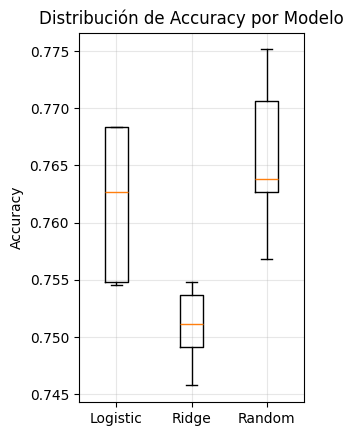

In [ ]:
plt.subplot(1, 2, 1)
plt.boxplot([results[name] for name in models.keys()],
           labels=[name.split()[0] for name in models.keys()])
plt.title('Distribución de Accuracy por Modelo')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

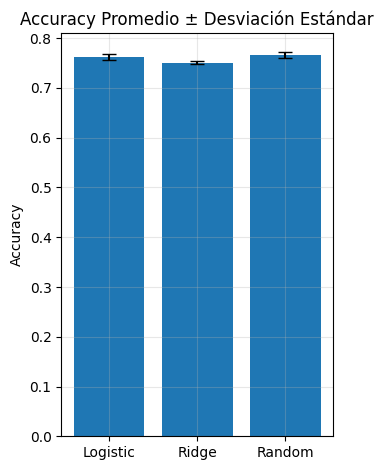

In [ ]:
plt.subplot(1, 2, 2)
names = list(models.keys())
means = [results[name].mean() for name in names]
stds = [results[name].std() for name in names]

plt.bar(range(len(names)), means, yerr=stds, capsize=5)
plt.xticks(range(len(names)), [name.split()[0] for name in names])
plt.title('Accuracy Promedio ± Desviación Estándar')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Cross-Validation: Técnica que divide los datos en k partes para entrenar y evaluar múltiples veces.

Accuracy promedio: La estimación media de rendimiento esperado en datos nuevos.

Desviación estándar: Indica qué tan variable o consistente es el modelo entre diferentes divisiones de datos.

StratifiedKFold: Mantiene la proporción de clases en cada fold, especialmente importante en datasets desbalanceados.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
best_model_base = models[best_model_name]

print(f"Optimizando hiperparámetros para: {best_model_name}")

Optimizando hiperparámetros para: Random Forest


In [ ]:
if 'Random Forest' in best_model_name:
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }
elif 'Logistic' in best_model_name:
    param_grid = {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__max_iter': [1000, 2000]
    }
else:  # Ridge
    param_grid = {
        'classifier__alpha': [0.1, 1, 10, 100]
    }


In [ ]:
print("\nMétodo 1: GridSearchCV (búsqueda exhaustiva)")
grid_search = GridSearchCV(
    best_model_base,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_features, y_target)

print(f"Mejores parámetros (Grid): {grid_search.best_params_}")
print(f"Mejor score (Grid): {grid_search.best_score_:.4f}")


Método 1: GridSearchCV (búsqueda exhaustiva)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros (Grid): {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Mejor score (Grid): 0.7783


In [ ]:
print("\nMétodo 2: RandomizedSearchCV (búsqueda aleatoria)")
random_search = RandomizedSearchCV(
    best_model_base,
    param_grid,
    n_iter=20,  # Solo 20 combinaciones aleatorias
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_features, y_target)

print(f"Mejores parámetros (Random): {random_search.best_params_}")
print(f"Mejor score (Random): {random_search.best_score_:.4f}")


Método 2: RandomizedSearchCV (búsqueda aleatoria)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros (Random): {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__max_depth': 30}
Mejor score (Random): 0.7783


In [ ]:
print(f"\nComparación de eficiencia:")
print(f"GridSearch probó: {len(grid_search.cv_results_['params'])} combinaciones")
print(f"RandomSearch probó: {len(random_search.cv_results_['params'])} combinaciones")


Comparación de eficiencia:
GridSearch probó: 36 combinaciones
RandomSearch probó: 20 combinaciones


In [ ]:
final_model = grid_search.best_estimator_
final_scores = cross_val_score(final_model, X_features, y_target, cv=5)
print(f"\nModelo final optimizado: {final_scores.mean():.4f} ± {final_scores.std():.4f}")


Modelo final optimizado: 0.7783 ± 0.0067


¿Cuándo usar cada método?

Completa la guía de decisión:

GridSearchCV cuando tienes más hiperparámetros y más tiempo de cómputo.

RandomizedSearchCV cuando tienes menos hiperparámetros o menos tiempo limitado.

Pipeline + SearchCV siempre previene leakage automáticamente.

cross_val_score en el resultado final valida que la optimización no causó overfitting.

Usando el modelo ganador para explicabilidad
Componentes del pipeline: ['classifier']

TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:
Curricular units 2nd sem (approved): 0.1516
Curricular units 2nd sem (grade): 0.1193
Curricular units 1st sem (approved): 0.0987
Curricular units 1st sem (grade): 0.0589
Tuition fees up to date: 0.0466
Curricular units 2nd sem (evaluations): 0.0419
Admission grade: 0.0385
Age at enrollment: 0.0372
Curricular units 1st sem (evaluations): 0.0349
Previous qualification (grade): 0.0343


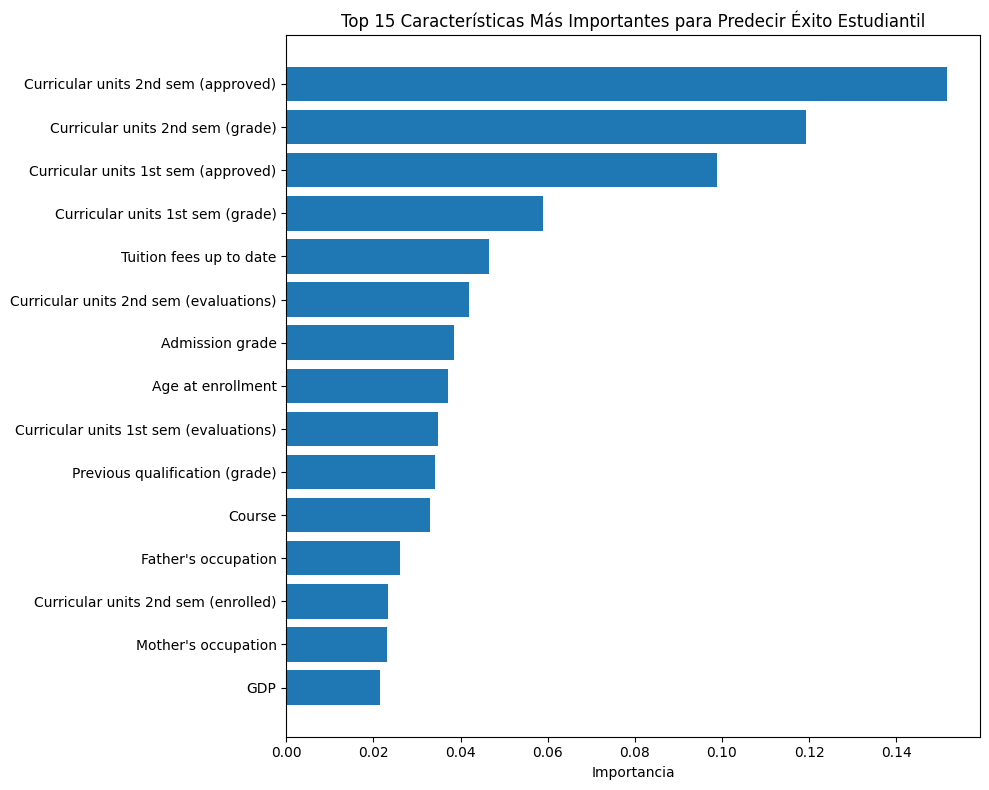


IMPORTANCIA POR CATEGORÍAS:
Factores académicos: 0.6443
Factores demográficos: 0.0499
Factores económicos: 0.0769

INTERPRETACIÓN PARA INTERVENCIONES:
La característica más importante es: Curricular units 2nd sem (approved)
Esto sugiere que para reducir abandono estudiantil debemos enfocarnos en:
1. Monitorear y mejorar: Curricular units 2nd sem (approved)
2. Monitorear y mejorar: Curricular units 2nd sem (grade)
3. Monitorear y mejorar: Curricular units 1st sem (approved)

ANÁLISIS DE ESTUDIANTE INDIVIDUAL (ejemplo):
Estudiante #0:
Predicción: Dropout
Probabilidades:
  Dropout: 0.737
  Enrolled: 0.082
  Graduate: 0.181

Top 5 características que influyen en esta predicción:
Curricular units 2nd sem (approved): 0.00 (importancia: 0.1516)
Curricular units 2nd sem (grade): 0.00 (importancia: 0.1193)
Curricular units 1st sem (approved): 0.00 (importancia: 0.0987)
Curricular units 1st sem (grade): 0.00 (importancia: 0.0589)
Tuition fees up to date: 1.00 (importancia: 0.0466)

VISUALIZACIÓ

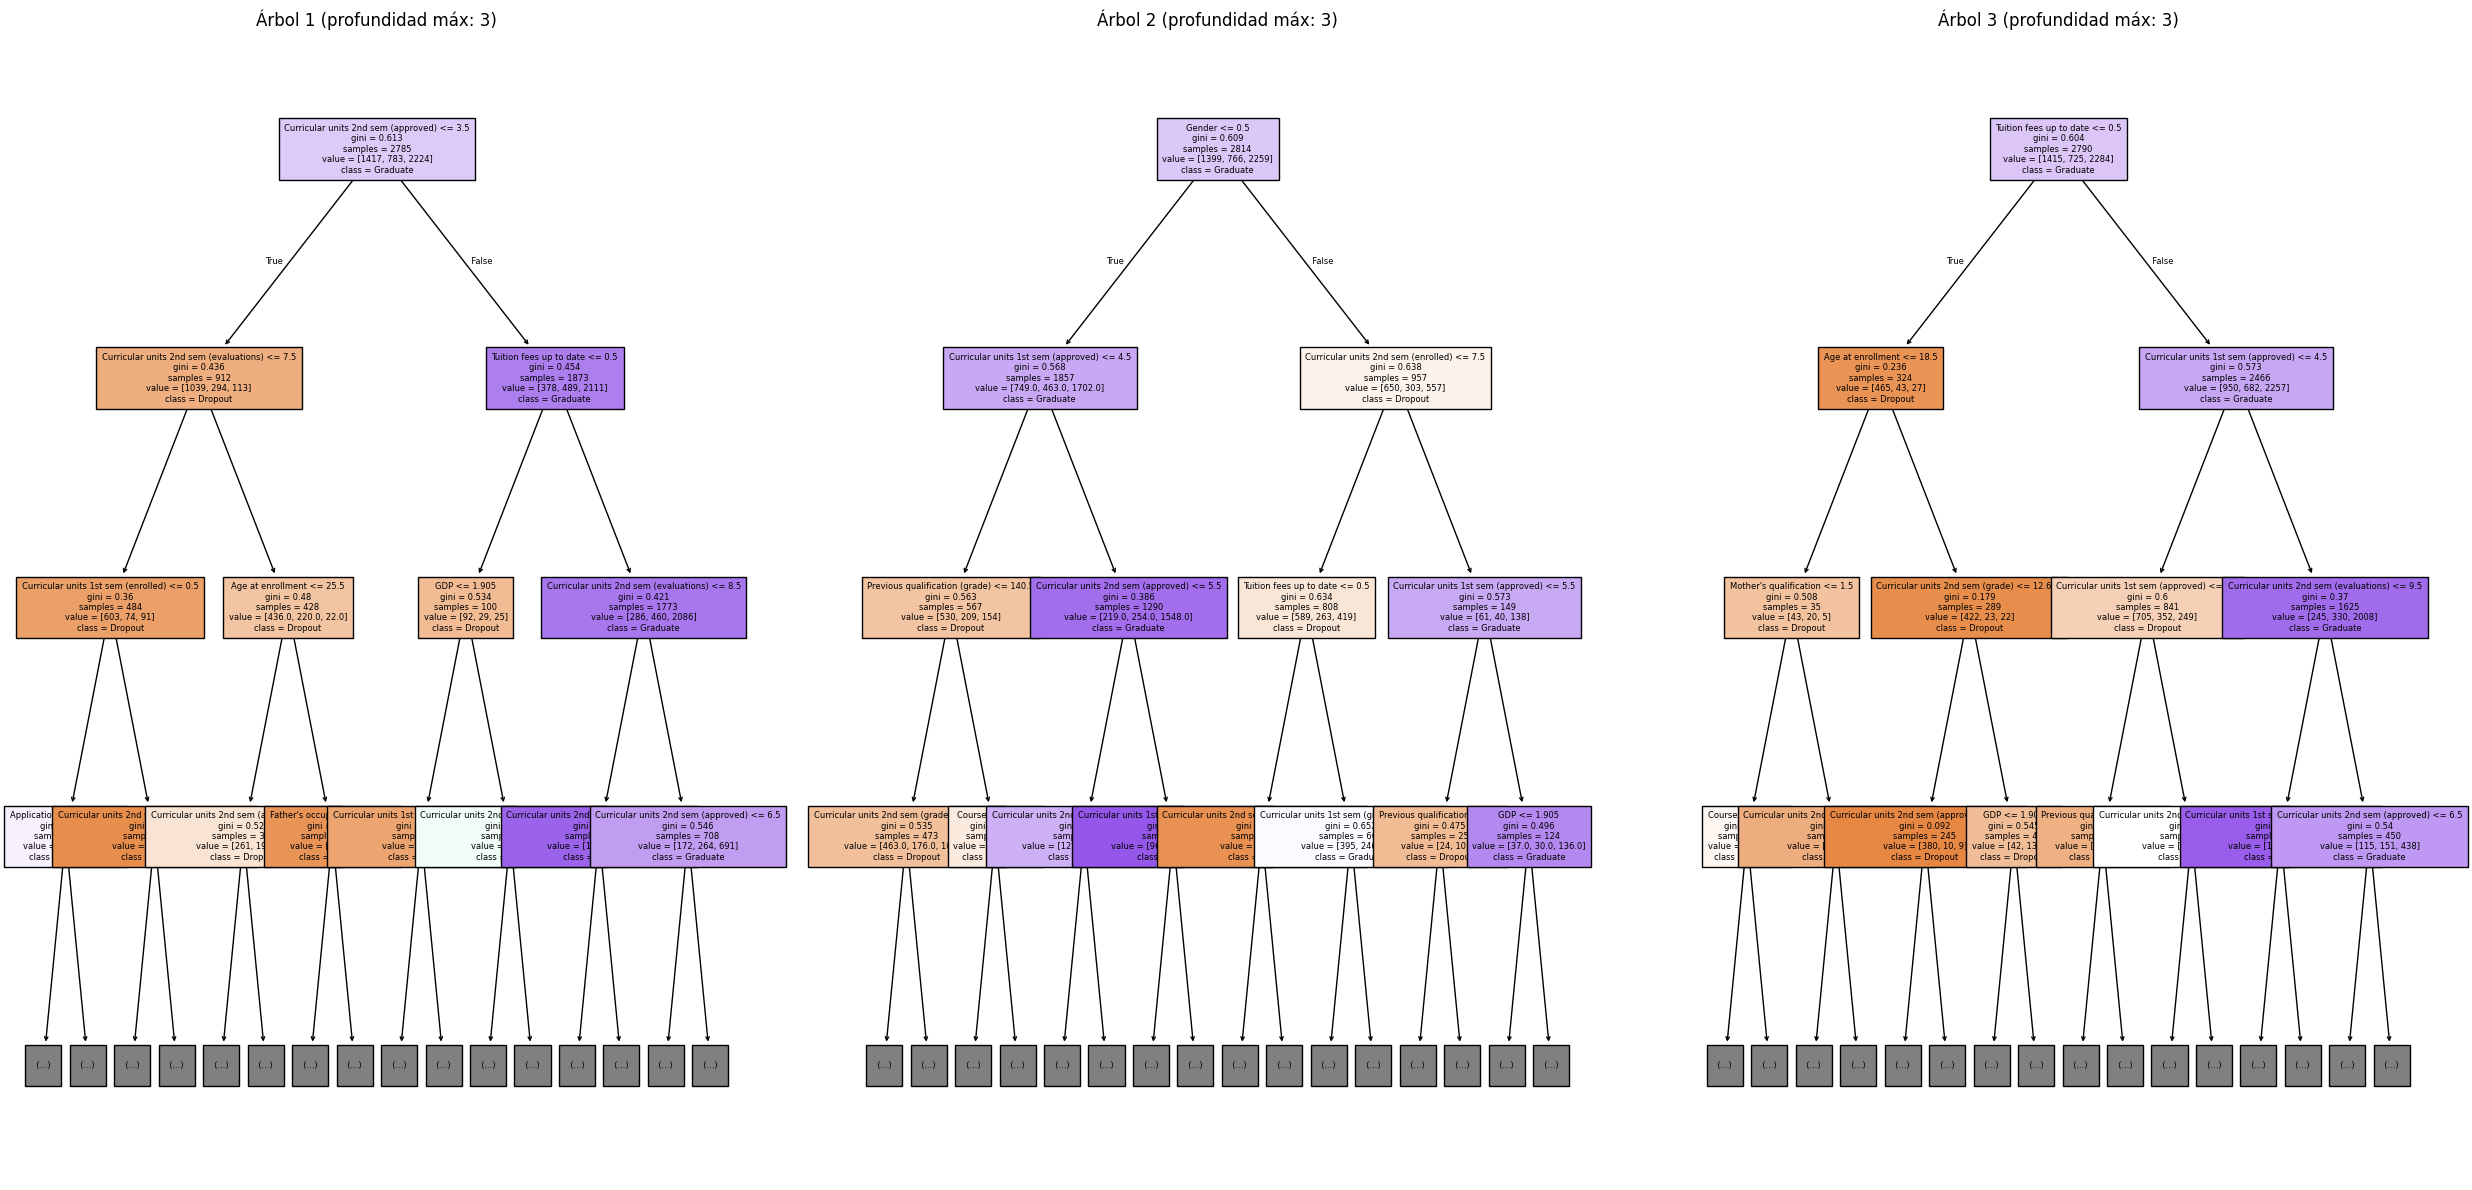


ESTADÍSTICAS DE LOS ÁRBOLES:
Profundidad promedio (primeros 5 árboles): 21.2
Número promedio de nodos (primeros 5): 1139.0

EJEMPLO DE REGLAS DE DECISIÓN (Árbol 1, simplificado):
|--- Curricular units 2nd sem (approved) <= 3.50
|   |--- Curricular units 2nd sem (evaluations) <= 7.50
|   |   |--- Curricular units 1st sem (enrolled) <= 0.50
|   |   |   |--- truncated branch of depth 10
|   |   |--- Curricular units 1st sem (enrolled) >  0.50
|   |   |   |--- truncated branch of depth 10
|   |--- Curricular units 2nd sem (evaluations) >  7.50
|   |   |--- Age at enrollment <= 25.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- Age at enrollment >  25.50
|   |  ...

DIVERSIDAD EN EL RANDOM FOREST:
El poder del Random Forest viene de la diversidad de sus árboles:
- Cada árbol ve una muestra diferente de datos (bootstrap)
- Cada split considera solo un subconjunto aleatorio de características
- La predicción final es el voto mayoritario de todos los árboles
Usando datos sin esc

In [ ]:
# Usar Random Forest para explicabilidad (si no ganó, crearlo)
if 'Random Forest' not in best_model_name:
    # Crear Random Forest específico para explicabilidad
    # Random Forest no necesita escalado, así que lo omitimos para simplicidad
    rf_model = Pipeline([
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    rf_model.fit(X_features, y_target)
    print("Creado Random Forest específico para análisis de explicabilidad")
else:
    rf_model = final_model
    print("Usando el modelo ganador para explicabilidad")

# Verificar estructura del pipeline
print(f"Componentes del pipeline: {list(rf_model.named_steps.keys())}")

# 1. FEATURE IMPORTANCE - ¿Qué características son más importantes?
feature_names = X_features.columns
importances = rf_model.named_steps['classifier'].feature_importances_

# Crear DataFrame para mejor visualización
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nTOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:")
for i, row in feature_importance_df.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Visualizar importancia de características
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 15 Características Más Importantes para Predecir Éxito Estudiantil')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. ANÁLISIS POR CATEGORÍAS - Agrupar características relacionadas
academic_features = [col for col in feature_names if any(word in col.lower()
                    for word in ['grade', 'units', 'curricular', 'semester'])]
demographic_features = [col for col in feature_names if any(word in col.lower()
                       for word in ['age', 'gender', 'nationality', 'marital'])]
economic_features = [col for col in feature_names if any(word in col.lower()
                    for word in ['scholarship', 'debt', 'fee', 'tuition'])]

def calculate_category_importance(features, importance_df):
    if not features:
        return 0
    category_importance = importance_df[importance_df['feature'].isin(features)]['importance'].sum()
    return category_importance

academic_importance = calculate_category_importance(academic_features, feature_importance_df)
demographic_importance = calculate_category_importance(demographic_features, feature_importance_df)
economic_importance = calculate_category_importance(economic_features, feature_importance_df)

print(f"\nIMPORTANCIA POR CATEGORÍAS:")
print(f"Factores académicos: {academic_importance:.4f}")
print(f"Factores demográficos: {demographic_importance:.4f}")
print(f"Factores económicos: {economic_importance:.4f}")

# 3. INTERPRETACIÓN PRÁCTICA - ¿Qué significa esto?
print(f"\nINTERPRETACIÓN PARA INTERVENCIONES:")
print(f"La característica más importante es: {feature_importance_df.iloc[0]['feature']}")
print(f"Esto sugiere que para reducir abandono estudiantil debemos enfocarnos en:")

# Generar recomendaciones basadas en las top features
top_3_features = feature_importance_df.head(3)['feature'].tolist()
for i, feature in enumerate(top_3_features, 1):
    print(f"{i}. Monitorear y mejorar: {feature}")

# 4. PREDICCIÓN INDIVIDUAL - ¿Por qué un estudiante específico está en riesgo?
print(f"\nANÁLISIS DE ESTUDIANTE INDIVIDUAL (ejemplo):")
student_idx = 0
student_data = X_features.iloc[student_idx:student_idx+1]
prediction = rf_model.predict(student_data)[0]
prediction_proba = rf_model.predict_proba(student_data)[0]

# Definir mapeo localmente para esta sección
outcome_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

# Manejar si prediction es string o número
if isinstance(prediction, str):
    predicted_outcome = prediction
else:
    predicted_outcome = outcome_mapping[prediction]

print(f"Estudiante #{student_idx}:")
print(f"Predicción: {predicted_outcome}")
print(f"Probabilidades:")
for i, prob in enumerate(prediction_proba):
    outcome_name = outcome_mapping[i]
    print(f"  {outcome_name}: {prob:.3f}")

# Mostrar las características más importantes de este estudiante
student_features = pd.DataFrame({
    'feature': feature_names,
    'value': student_data.iloc[0].values,
    'importance': importances
}).sort_values('importance', ascending=False)

print(f"\nTop 5 características que influyen en esta predicción:")
for i, row in student_features.head(5).iterrows():
    print(f"{row['feature']}: {row['value']:.2f} (importancia: {row['importance']:.4f})")

# 5. VISUALIZACIÓN DE ÁRBOLES INDIVIDUALES
print(f"\nVISUALIZACIÓN DE ÁRBOLES DEL RANDOM FOREST:")

# Instalar graphviz si no está disponible
try:
    from sklearn.tree import export_graphviz, plot_tree, export_text
    import matplotlib.pyplot as plt

    # Obtener algunos árboles del bosque
    forest = rf_model.named_steps['classifier']
    n_trees_to_show = min(3, len(forest.estimators_))

    print(f"Mostrando {n_trees_to_show} árboles de {len(forest.estimators_)} totales")

    # Visualizar árboles con plot_tree (más simple)
    fig, axes = plt.subplots(1, n_trees_to_show, figsize=(25, 12))
    if n_trees_to_show == 1:
        axes = [axes]

    for i in range(n_trees_to_show):
        tree = forest.estimators_[i]

        # Limitar profundidad para que sea legible
        plot_tree(tree,
                 ax=axes[i],
                 feature_names=list(feature_names),  # Usar todos los nombres de características
                 class_names=list(outcome_mapping.values()),
                 filled=True,
                 max_depth=3,  # Limitar profundidad
                 fontsize=6)  # Fuente más pequeña para que quepa

        axes[i].set_title(f'Árbol {i+1} (profundidad máx: 3)', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Información sobre la estructura de los árboles
    print(f"\nESTADÍSTICAS DE LOS ÁRBOLES:")
    depths = [tree.get_depth() for tree in forest.estimators_[:5]]
    n_nodes = [tree.tree_.node_count for tree in forest.estimators_[:5]]

    print(f"Profundidad promedio (primeros 5 árboles): {sum(depths)/len(depths):.1f}")
    print(f"Número promedio de nodos (primeros 5): {sum(n_nodes)/len(n_nodes):.1f}")

    # Mostrar un árbol muy simple por texto
    print(f"\nEJEMPLO DE REGLAS DE DECISIÓN (Árbol 1, simplificado):")
    tree_rules = export_text(forest.estimators_[0],
                           feature_names=list(feature_names),
                           max_depth=2)
    print(tree_rules[:500] + "..." if len(tree_rules) > 500 else tree_rules)

except ImportError:
    print("Para visualizar árboles, instala: pip install graphviz")
    print("Alternativamente, mostramos la estructura del bosque:")

    forest = rf_model.named_steps['classifier']
    print(f"Random Forest contiene {len(forest.estimators_)} árboles")
    print(f"Cada árbol fue entrenado con {forest.max_features_} características aleatorias")

    # Estadísticas básicas sin visualización
    if len(forest.estimators_) > 0:
        depths = [tree.get_depth() for tree in forest.estimators_[:5]]
        print(f"Profundidad promedio: {sum(depths)/len(depths):.1f}")

# 6. DIVERSIDAD DEL BOSQUE
print(f"\nDIVERSIDAD EN EL RANDOM FOREST:")
print("El poder del Random Forest viene de la diversidad de sus árboles:")
print("- Cada árbol ve una muestra diferente de datos (bootstrap)")
print("- Cada split considera solo un subconjunto aleatorio de características")
print("- La predicción final es el voto mayoritario de todos los árboles")

# Mostrar diferencias en predicciones individuales
student_sample = X_features.iloc[0:1]
individual_predictions = []

# Preparar datos dependiendo de si el modelo tiene scaler o no
if 'scaler' in rf_model.named_steps:
    # Modelo con scaler
    scaled_sample = rf_model.named_steps['scaler'].transform(student_sample)
    print("Usando datos escalados para árboles individuales")
else:
    # Modelo sin scaler (ej: Random Forest sin preprocesamiento)
    scaled_sample = student_sample.values
    print("Usando datos sin escalar para árboles individuales")

for i, tree in enumerate(forest.estimators_[:5]):
    tree_pred = tree.predict(scaled_sample)[0]
    individual_predictions.append(tree_pred)

print(f"\nPredicciones de árboles individuales para el Estudiante #0:")
for i, pred in enumerate(individual_predictions):
    pred_name = outcome_mapping[pred] if isinstance(pred, int) else pred
    print(f"  Árbol {i+1}: {pred_name}")

final_pred = max(set(individual_predictions), key=individual_predictions.count)
final_pred_name = outcome_mapping[final_pred] if isinstance(final_pred, int) else final_pred
print(f"Predicción final (voto mayoritario): {final_pred_name}")

Confianza: Los educadores necesitan entender por qué el modelo predice abandono.

Intervenciones: Conocer las características importantes permite crear estrategias de apoyo específicas.

Bias detection: La explicabilidad ayuda a detectar sesgos o discriminación en el modelo.

Regulaciones: Muchos contextos requieren modelos transparentes y explicables por ley.

Mejora continua: Entender el modelo ayuda a optimizar y refinar futuras versiones.


¿Qué es data leakage y por qué es peligroso?
Data leakage ocurre cuando el modelo ve información del futuro o del conjunto de test durante el entrenamiento.
Es peligroso porque inflará artificialmente la performance y hará que el modelo falle en datos nuevos reales.
¿Cuándo usar KFold vs StratifiedKFold?
KFold: dividir datos aleatoriamente en k partes; sirve si las clases están balanceadas.
StratifiedKFold: mantiene la proporción de clases en cada fold; ideal si alguna clase tiene pocas muestras o hay desbalance.
¿Cómo interpretar "95.2% ± 2.1%" en cross-validation?
95.2%: accuracy promedio del modelo en los folds.
± 2.1%: desviación estándar, indica la variabilidad o estabilidad del modelo entre los folds.
¿Por qué Random Forest no necesita StandardScaler?
Los árboles de decisión y ensembles (Random Forest) no dependen de la escala de las variables.
Se basan en umbrales y divisiones, no en distancias o magnitudes absolutas, a diferencia de regresión o SVM.
En diagnóstico médico, ¿prefieres un modelo con 98% accuracy pero inestable, o 95% accuracy pero muy estable?
Se prefiere 95% accuracy estable.
En medicina, confiabilidad y consistencia son más importantes que un rendimiento máximo variable, para no arriesgar decisiones críticas sobre pacientes.